### Prerequisitos

Instalación de las librerias base para la ejecucion de Modelo

* opencv-python
* imgaug
* keras-segmentation

In [15]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python
#!pip install albumentations
#!pip install imgaug==0.2.7
#!pip install keras-segmentation
!pip install keras-segmentation==0.3.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


### Ejemplo de Implementación (Red Pre-Entrenado)

Para este ejemplo se utilizará la red pre-entrenada [PSPNet](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html]), usando como dataset [Pascal VOC 2012](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/).

In [18]:
# Ejemplo tomado de: https://github.com/divamgupta/image-segmentation-keras#pre-trained-models
from keras_segmentation.pretrained import pspnet_101_voc12

model = pspnet_101_voc12()

out = model.predict_segmentation(
    inp="moto_gp_01.jpg",
    out_fname="out.png"
)

A continuación se muestra la imágen original y la imágen segmentada.

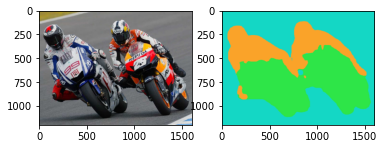

In [19]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread(r"moto_gp_01.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(r"out.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img1)
f.add_subplot(1,2, 2)
plt.imshow(img2)
plt.show(block=True)

### Entrenamiento de la Red Neuronal (vgg_unet)

* Se utilizara el [dataset1](https://drive.google.com/file/d/0B0d9ZiqAgFkiOHR1NTJhWVJMNEU/view?usp=sharing) que tiene imagenes etiquetadas
* El codigo de entrenamiento se ha tomado de [A Beginner's guide to Deep Learning based Semantic Segmentation using Keras](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html)

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=51 ,  input_height=416, input_width=608  )

model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5
)

out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )